In [2]:
import pandas as pd
import numpy as np

In [3]:
credit=pd.read_csv("default.csv")

In [4]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
credit.shape

(30000, 25)

In [6]:
credit.isnull().sum().sum()

0

In [7]:
credit=credit.rename(columns={'default payment next month':'default'})

In [8]:
credit = credit.rename(columns={"PAY_0": "PAY_1"})


In [9]:
credit=credit.drop('ID',axis=1)

In [10]:
credit[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500
std,129747.661567,0.489129,0.790349,0.521970,9.217904
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


In [11]:
credit[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [12]:
credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [13]:
credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [14]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
credit['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [16]:
#Exploratory Data Analysis

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

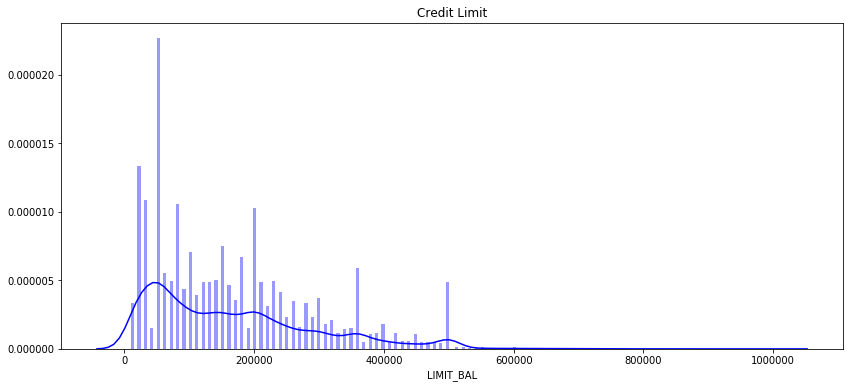

In [18]:
plt.rcParams['figure.figsize'] = (14,6)
plt.title('Credit Limit')
sns.distplot(credit.LIMIT_BAL,color='blue',kde=True, bins=200)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8b286a320>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8b286a9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8b2863eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8b286ae10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8b2874400>],
 'means': []}

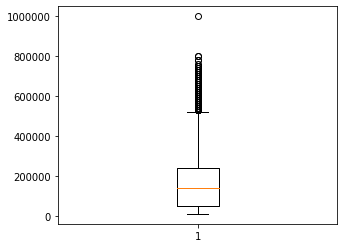

In [19]:
plt.rcParams['figure.figsize'] = (5,4)
plt.boxplot(credit.LIMIT_BAL)

In [20]:
#Number of Outliers

outliers=[]
def detect_outlier(credit):
    
    threshold=3
    mean_1 = np.mean(credit.LIMIT_BAL)
    std_1 =np.std(credit.LIMIT_BAL)
    
    for y in credit.LIMIT_BAL:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            
    return outliers
outlier_datapoints = len(detect_outlier(credit))
print("Number of outliers are:",outlier_datapoints)

det=detect_outlier(credit)
print(det)

Number of outliers are: 130
[630000, 580000, 600000, 620000, 630000, 610000, 700000, 670000, 680000, 630000, 580000, 580000, 1000000, 600000, 580000, 600000, 710000, 560000, 710000, 750000, 710000, 580000, 750000, 680000, 640000, 580000, 640000, 710000, 670000, 610000, 570000, 560000, 640000, 610000, 590000, 640000, 700000, 580000, 640000, 700000, 570000, 660000, 560000, 600000, 620000, 630000, 750000, 720000, 630000, 620000, 600000, 610000, 610000, 620000, 560000, 660000, 750000, 610000, 740000, 600000, 700000, 800000, 590000, 600000, 600000, 570000, 570000, 630000, 560000, 570000, 800000, 590000, 680000, 580000, 560000, 600000, 560000, 700000, 560000, 710000, 640000, 660000, 700000, 760000, 680000, 570000, 560000, 590000, 600000, 620000, 620000, 570000, 610000, 710000, 690000, 600000, 650000, 700000, 600000, 600000, 620000, 580000, 780000, 620000, 600000, 590000, 730000, 740000, 600000, 650000, 720000, 600000, 670000, 610000, 560000, 720000, 580000, 700000, 730000, 640000, 780000, 59

In [21]:
credit['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [22]:
print(credit['LIMIT_BAL'].quantile(0.50))
print(credit['LIMIT_BAL'].quantile(0.95))

140000.0
430000.0


In [23]:
credit['LIMIT_BAL'] = np.where(credit['LIMIT_BAL'] > 430000, 140000, credit['LIMIT_BAL'])
credit['LIMIT_BAL'].describe()

count     30000.000000
mean     149803.656000
std      104868.031824
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      210000.000000
max      430000.000000
Name: LIMIT_BAL, dtype: float64

In [24]:
#Number of Outliers

outliers=[]
def detect_outlier(credit):
    
    threshold=3
    mean_1 = np.mean(credit.LIMIT_BAL)
    std_1 =np.std(credit.LIMIT_BAL)
    
    for y in credit.LIMIT_BAL:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            
    return outliers
outlier_datapoints = len(detect_outlier(credit))
print("Number of outliers are:",outlier_datapoints)

det=detect_outlier(credit)
print(det)

Number of outliers are: 0
[]


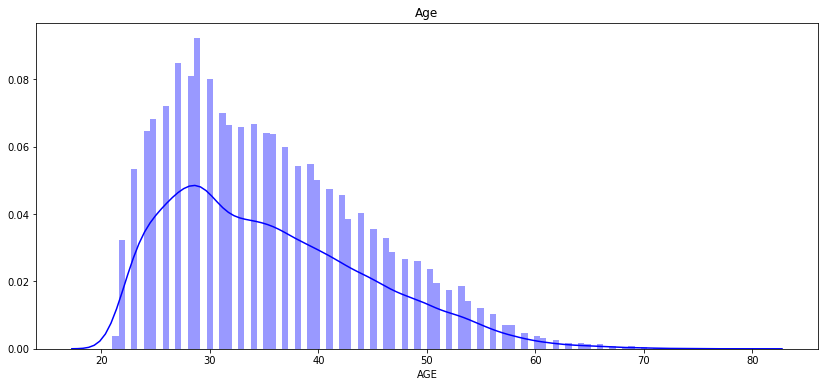

In [25]:
plt.rcParams['figure.figsize'] = (14,6)
plt.title('Age')
sns.distplot(credit.AGE,color='blue',kde=True, bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8b27fa358>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8b27faa58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8b27efef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8b27fae80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8b29e4470>],
 'means': []}

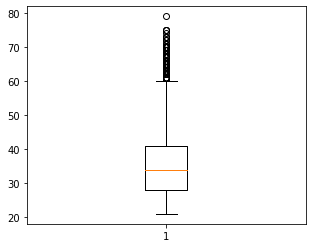

In [26]:

plt.rcParams['figure.figsize'] = (5,4)
plt.boxplot(credit.AGE)

In [27]:
#Number of Outliers

outliers=[]
def detect_outlier(credit):
    
    threshold=3
    mean_1 = np.mean(credit.AGE)
    std_1 =np.std(credit.AGE)
    
    for y in credit.AGE:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            
    return outliers
outlier_datapoints = len(detect_outlier(credit))
print("Number of outliers are:",outlier_datapoints)

det=detect_outlier(credit)
print(det)

Number of outliers are: 141
[75, 73, 67, 67, 66, 66, 70, 70, 72, 64, 65, 65, 67, 71, 66, 66, 67, 65, 66, 64, 66, 64, 66, 65, 64, 67, 66, 69, 67, 70, 71, 68, 64, 64, 64, 68, 65, 66, 68, 64, 70, 65, 65, 69, 64, 66, 67, 69, 69, 69, 70, 66, 67, 65, 64, 66, 73, 65, 69, 68, 64, 69, 64, 65, 66, 64, 66, 69, 69, 65, 64, 66, 67, 64, 64, 65, 66, 69, 69, 64, 66, 65, 67, 70, 64, 66, 64, 64, 79, 66, 69, 66, 72, 70, 69, 64, 64, 65, 66, 64, 66, 64, 67, 70, 70, 64, 68, 69, 67, 65, 64, 65, 65, 64, 67, 67, 65, 65, 65, 66, 66, 75, 75, 72, 65, 69, 64, 67, 65, 71, 64, 65, 64, 65, 66, 70, 67, 73, 64, 74, 73, 75, 73, 67, 67, 66, 66, 70, 70, 72, 64, 65, 65, 67, 71, 66, 66, 67, 65, 66, 64, 66, 64, 66, 65, 64, 67, 66, 69, 67, 70, 71, 68, 64, 64, 64, 68, 65, 66, 68, 64, 70, 65, 65, 69, 64, 66, 67, 69, 69, 69, 70, 66, 67, 65, 64, 66, 73, 65, 69, 68, 64, 69, 64, 65, 66, 64, 66, 69, 69, 65, 64, 66, 67, 64, 64, 65, 66, 69, 69, 64, 66, 65, 67, 70, 64, 66, 64, 64, 79, 66, 69, 66, 72, 70, 69, 64, 64, 65, 66, 64, 66, 64,

In [28]:
credit['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [29]:
print(credit['AGE'].quantile(0.50))
print(credit['AGE'].quantile(0.95))

34.0
53.0


In [30]:
credit['AGE'] = np.where(credit['AGE'] > 53, 34, credit['AGE'])
credit['AGE'].describe()

count    30000.000000
mean        34.449333
std          7.840983
min         21.000000
25%         28.000000
50%         34.000000
75%         40.000000
max         53.000000
Name: AGE, dtype: float64

In [31]:
#Number of Outliers

outliers=[]
def detect_outlier(credit):
    
    threshold=3
    mean_1 = np.mean(credit.AGE)
    std_1 =np.std(credit.AGE)
    
    for y in credit.AGE:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            
    return outliers
outlier_datapoints = len(detect_outlier(credit))
print("Number of outliers are:",outlier_datapoints)

det=detect_outlier(credit)
print(det)

Number of outliers are: 0
[]


In [32]:
default_clean=credit.to_csv('default_clean.csv')

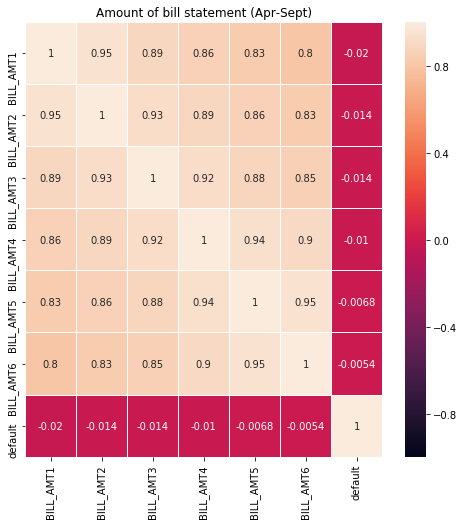

In [33]:
bill_amount = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'default']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept)')
corr = credit[bill_amount].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot=True)
plt.show()

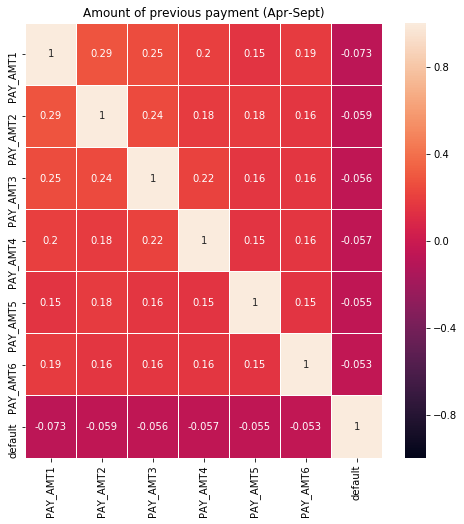

In [34]:
pay_amount = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept)')
corr = credit[pay_amount].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot=True)
plt.show()

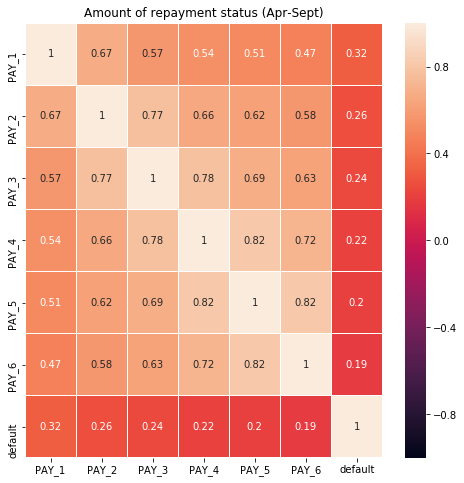

In [35]:
repay_amount = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'default']

plt.figure(figsize = (8,8))
plt.title('Amount of repayment status (Apr-Sept)')
corr = credit[repay_amount].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot=True)
plt.show()

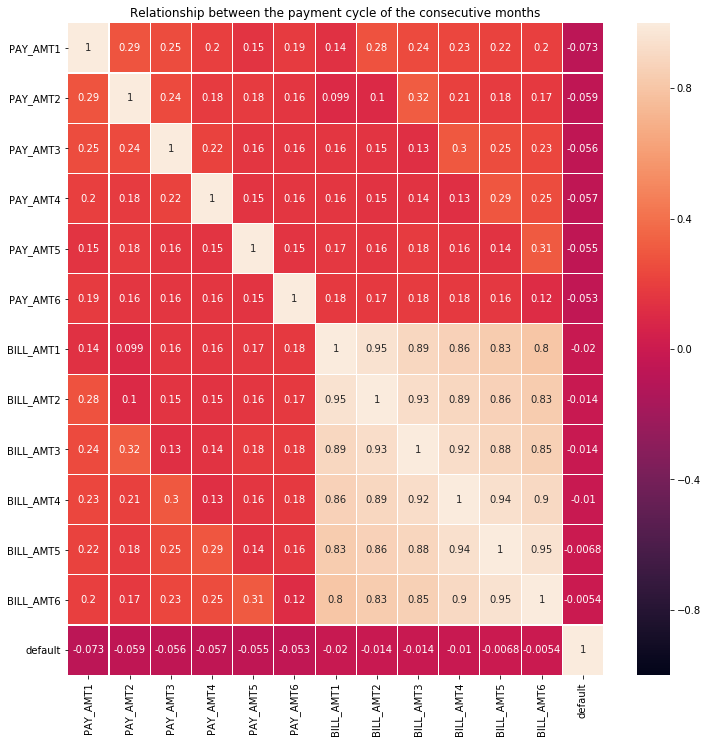

In [36]:
repay_amount = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'default']

plt.figure(figsize = (12,12))
plt.title('Relationship between the payment cycle of the consecutive months')
corr = credit[repay_amount].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, annot=True)
plt.show()

In [37]:
credit_clean = pd.get_dummies(credit)

credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [38]:
#Getting dependent and Independent Variable

x=credit_clean
x = x.drop(['default'], axis = 1)

y = credit['default']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (30000, 23)
Shape of y: (30000,)


In [39]:
#Spliting dataset into training and testing dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 41)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
#Modelling with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Accuracy of Random Forest Classifier model is:", round((model.score(x_test,y_test))*100))

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest Classifier model is: 81.0


array([[6591,  407],
       [1329,  673]], dtype=int64)

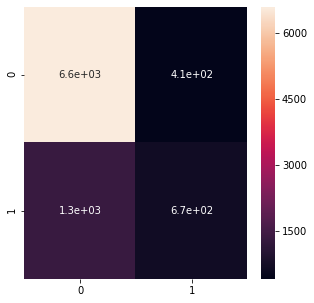

In [42]:
#Confusion Matrix of Random Forest Classifier

cm=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm, annot=True)
cm

In [43]:
#Generating Random Forest Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6998
           1       0.62      0.34      0.44      2002

    accuracy                           0.81      9000
   macro avg       0.73      0.64      0.66      9000
weighted avg       0.79      0.81      0.78      9000



In [44]:
from sklearn.ensemble import AdaBoostClassifier

model= AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=41)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Accuracy of Ada Boost Classifier model is:", round((model.score(x_test,y_test))*100))

Accuracy of Ada Boost Classifier model is: 82.0


array([[6696,  302],
       [1311,  691]], dtype=int64)

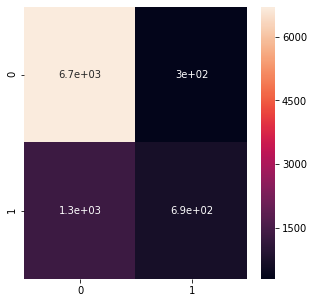

In [45]:
#Confusion Matrix of Ada Boost Classifier

cm=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm, annot=True)
cm

In [46]:
#Generating Ada Boost Classifier Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6998
           1       0.70      0.35      0.46      2002

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



In [47]:
#Modelling with Support Vector Machine Classifier

from sklearn.svm import LinearSVC

model=LinearSVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

model.score(x_test,y_test)

print("Accuracy of Support Vector Classifier model is:", round((model.score(x_test,y_test))*100))

Accuracy of Support Vector Classifier model is: 57.0


C:\Users\shash\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[3971, 3027],
       [ 844, 1158]], dtype=int64)

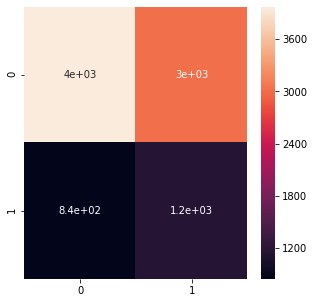

In [48]:
#Confusion Matrix of Ada Boost Classifier

cm=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm, annot=True)
cm

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

model= GradientBoostingClassifier(n_estimators=200, learning_rate=1, random_state=41)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Accuracy of Gradient Boosting Classifier model is:", round((model.score(x_test,y_test))*100))

Accuracy of Gradient Boosting Classifier model is: 79.0


array([[6313,  685],
       [1225,  777]], dtype=int64)

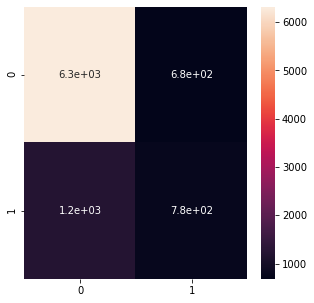

In [50]:
#Confusion Matrix of Gradient Boosting Classifier

cm=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm, annot=True)
cm